In [2]:
import pandas as pd
import skimage.io as io
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [3]:
df=pd.read_csv('similitudes_paginas.csv', sep=',')

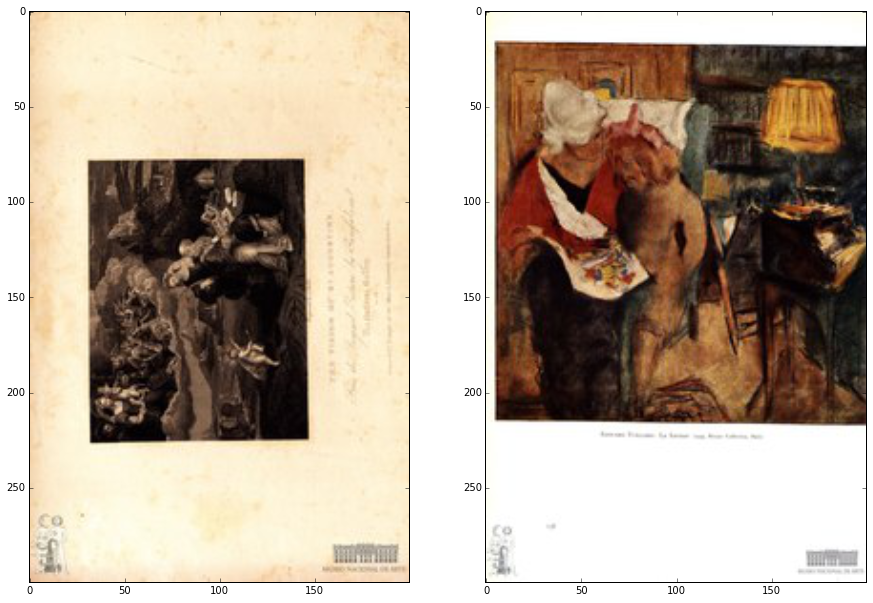

In [4]:
imagen_1 = io.imread(df["V2"][0])
imagen_2 = io.imread(df["V3"][2])

ig, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(imagen_1)
axs[1].imshow(imagen_2)

In [5]:
image_r = [round(i,1) for i in imagen_1[:,:,0].reshape(60000,1)/256.0]
image_g = [round(i,1) for i in imagen_1[:,:,1].reshape(60000,1)/256.0]
image_b = [round(i,1) for i in imagen_1[:,:,2].reshape(60000,1)/256.0]

RGB = [(image_r[i],image_g[i],image_b[i]) for i in range(len(image_r))]

In [6]:
print len(RGB), len(set(RGB))

60000 80


In [7]:
image_r = [round(i,1) for i in imagen_2[:,:,0].reshape(60000,1)/256.0]
image_g = [round(i,1) for i in imagen_2[:,:,1].reshape(60000,1)/256.0]
image_b = [round(i,1) for i in imagen_2[:,:,2].reshape(60000,1)/256.0]

RGB = [(image_r[i],image_g[i],image_b[i]) for i in range(len(image_r))]

print len(RGB), len(set(RGB))

60000 188


In [8]:
import random
random.sample(range(df.shape[0]),15)

[22920,
 38790,
 76157,
 59219,
 21732,
 49205,
 77488,
 1341,
 44919,
 62783,
 18692,
 7288,
 75232,
 13151,
 31862]

Hacer varias veces este proceso para ver que las imagenes tienen más colores

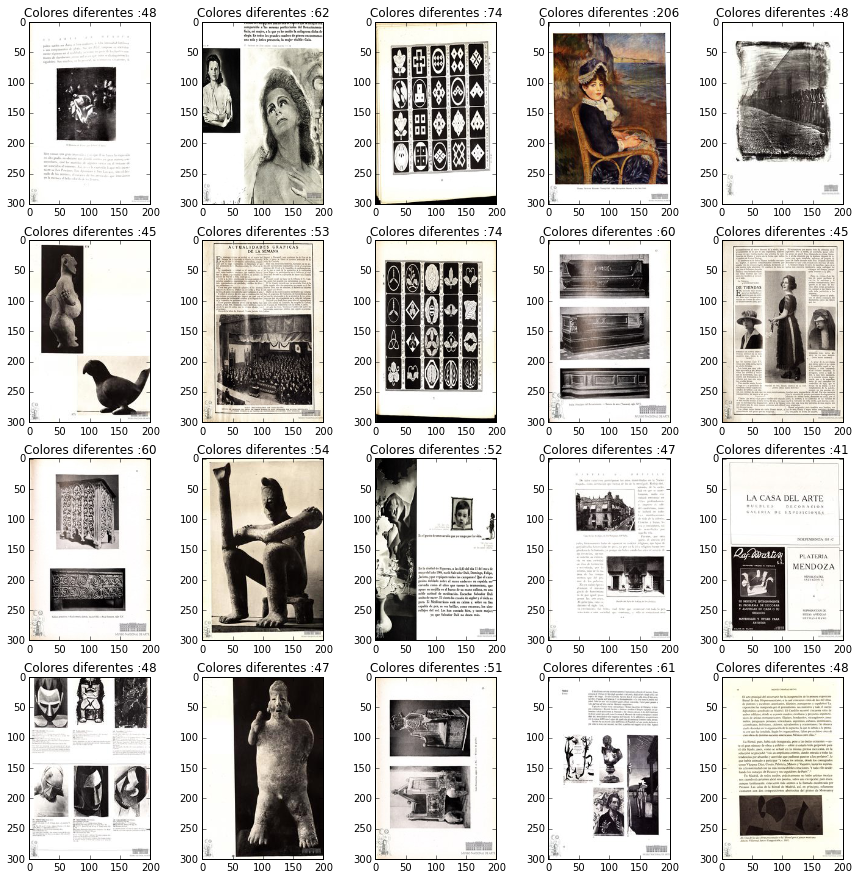

In [9]:
ig, axs = plt.subplots(4,5,figsize=(15,15))
lista = random.sample(range(df.shape[0]),20)

for i in range(len(lista)):
    imagen = io.imread(df["V2"][lista[i]])
    image_r = [round(e,1) for e in imagen[:,:,0].reshape(60000,1)/256.0]
    image_g = [round(e,1) for e in imagen[:,:,1].reshape(60000,1)/256.0]
    image_b = [round(e,1) for e in imagen[:,:,2].reshape(60000,1)/256.0]

    RGB = [(image_r[u],image_g[u],image_b[u]) for u in range(len(image_r))]
    
    axs[i / 5,i % 5].set_title("Colores diferentes :" + str(len(set(RGB))))
    axs[i / 5,i % 5].imshow(imagen)

In [10]:
import os

In [11]:
ruta_libro = "Libros/diego_rivera_i_pintura_de_caballete_y_dibujos_1979/jpg"
paginas = [ruta_libro + "/" + pagina for pagina in os.listdir(ruta_libro)]

In [12]:
import numpy as np
import pandas as pd

In [ ]:
ig, axs = plt.subplots(4,5,figsize=(15,15))
lista = random.sample(range(len(paginas)),20)

for i in range(len(lista)):
    imagen = io.imread(paginas[lista[i]])
    imagen = imagen/256.0
    imagen = imagen.round(1)
    image_r = imagen[:,:,0].flatten()
    image_g = imagen[:,:,1].flatten()
    image_b = imagen[:,:,2].flatten()

    #RGB = [(image_r[u],image_g[u],image_b[u]) for u in range(len(image_r))]
    df = pd.DataFrame({'r':image_r, 'g': image_g, 'b':image_b})
    df_2 = df.drop_duplicates()
    
    axs[i / 5,i % 5].set_title("Colores diferentes :" + str(df_2.shape[0]))
    axs[i / 5,i % 5].imshow(imagen)